# Analysing Other Models
### Author: Ben Newell

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# Read the data
df = pd.read_csv(r"C:\Users\benne\OneDrive\Desktop\Important things\data science\Group project\datasets\bird_final.csv")
df_clean = df.copy()

### Linear Regression, Random Forrest, SVR and Gradient Boosting models


Training Linear Regression...

Training Random Forest...

Training SVR...

Training Gradient Boosting...


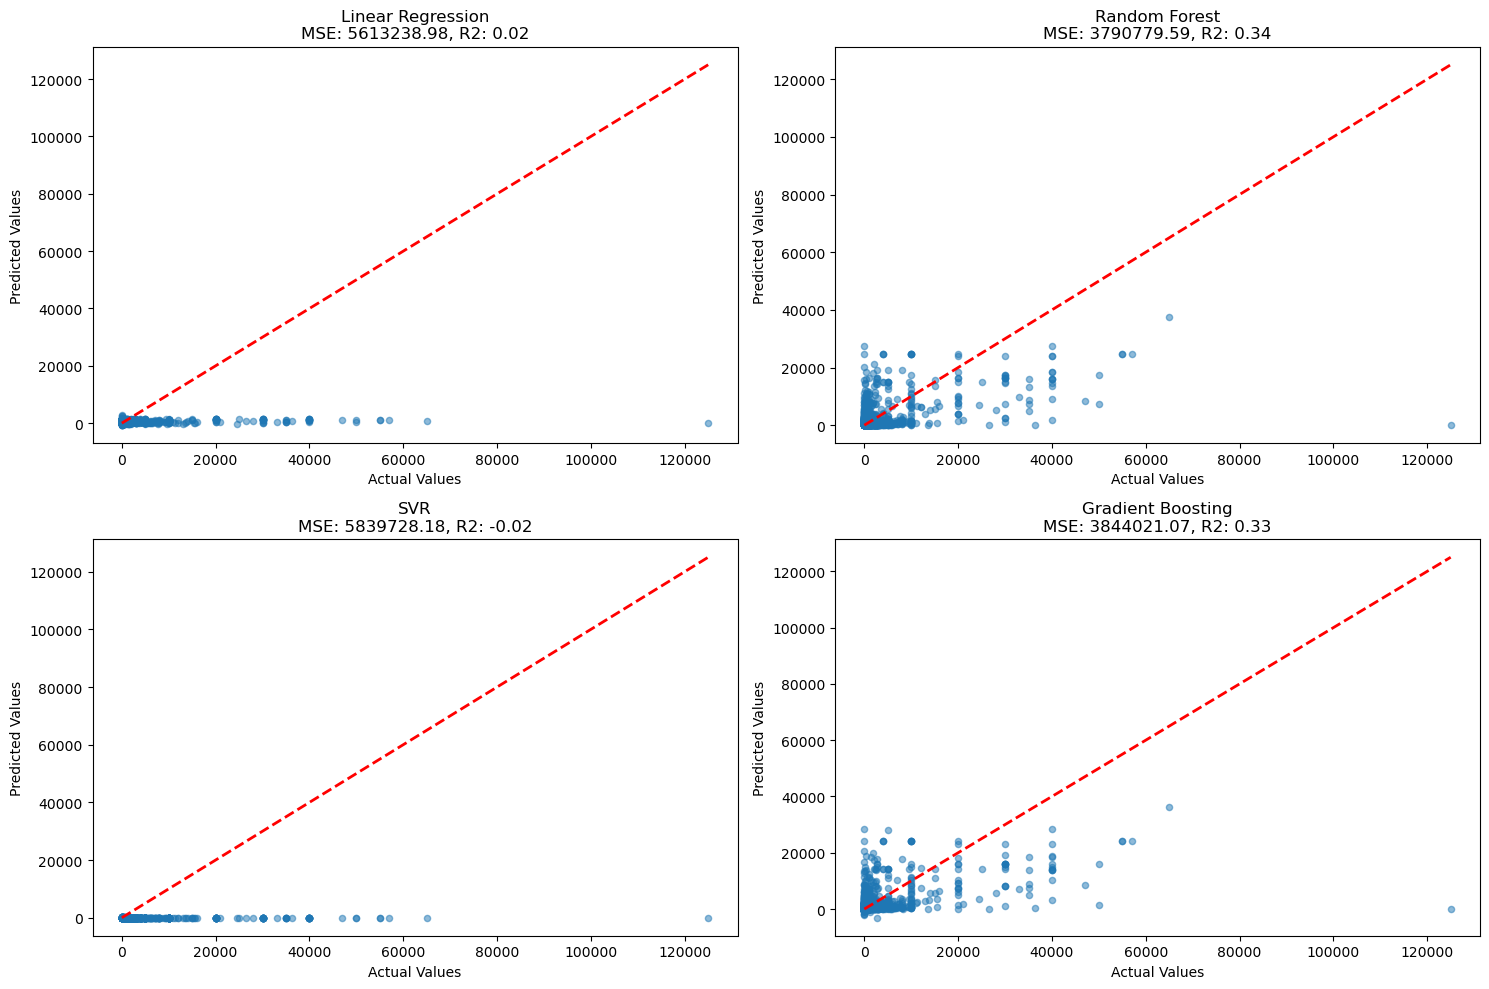

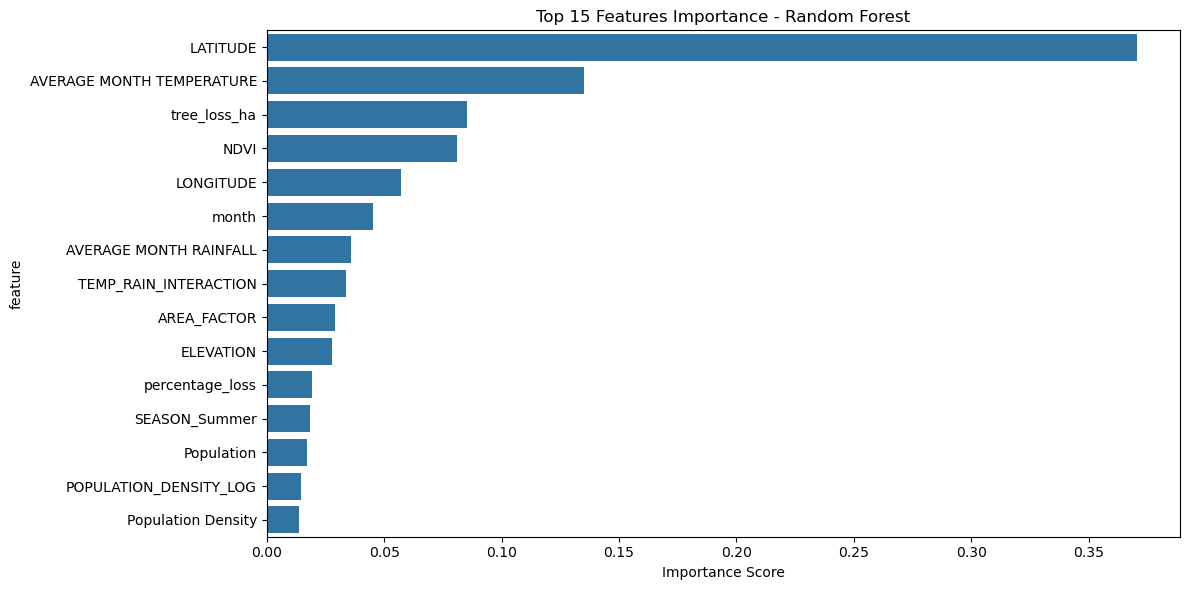

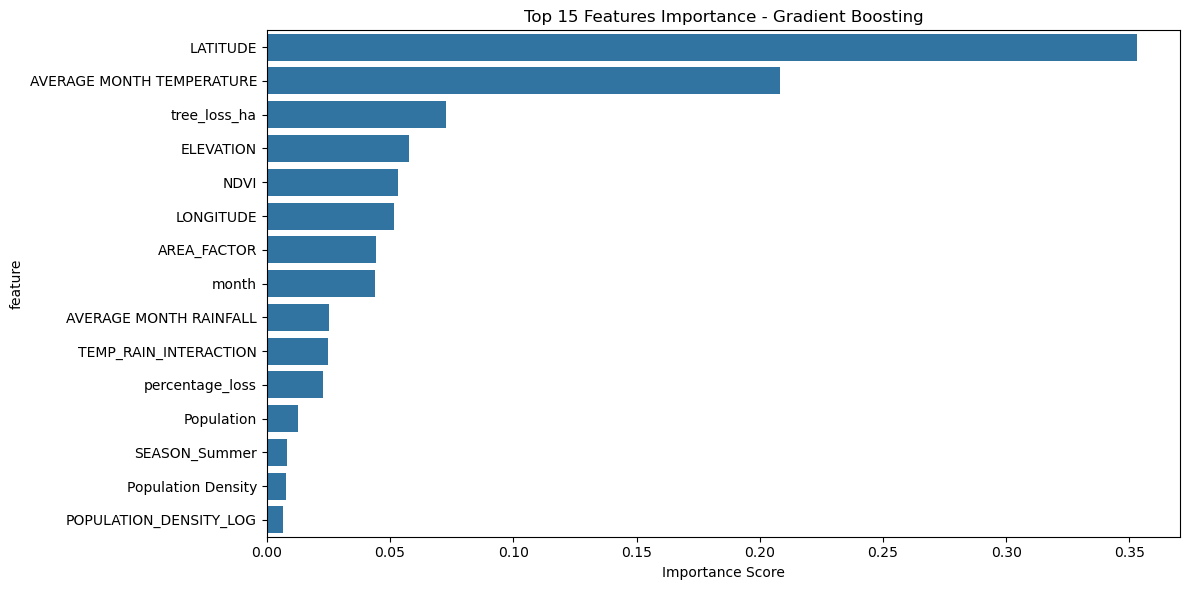


Detailed Model Performance:

Linear Regression:
Mean Squared Error: 5613238.98
R-squared Score: 0.02
Root Mean Squared Error: 2369.23

Random Forest:
Mean Squared Error: 3790779.59
R-squared Score: 0.34
Root Mean Squared Error: 1946.99

SVR:
Mean Squared Error: 5839728.18
R-squared Score: -0.02
Root Mean Squared Error: 2416.55

Gradient Boosting:
Mean Squared Error: 3844021.07
R-squared Score: 0.33
Root Mean Squared Error: 1960.62


In [9]:
# Additional feature engineering
df_clean['ELEVATION'] = df_clean['LATITUDE'].abs() + df_clean['LONGITUDE'].abs()
df_clean['TEMP_RAIN_INTERACTION'] = df_clean['AVERAGE MONTH TEMPERATURE'] * df_clean['AVERAGE MONTH RAINFALL']
df_clean['POPULATION_DENSITY_LOG'] = np.log1p(df_clean['Population Density'])
df_clean['AREA_FACTOR'] = df_clean['LATITUDE'].abs() * df_clean['LONGITUDE'].abs()
df_clean['SEASON'] = pd.cut(df_clean['month'], 
                           bins=[0, 3, 6, 9, 12], 
                           labels=['Winter', 'Spring', 'Summer', 'Fall'])
df_clean = pd.get_dummies(df_clean, columns=['SEASON'])

# Updated features list
features = ['LATITUDE', 'LONGITUDE', 'AVERAGE MONTH TEMPERATURE', 
           'AVERAGE MONTH RAINFALL', 'tree_loss_ha', 'percentage_loss',
           'Population', 'NDVI', 'Population Density', 'month', 'WT_COUNT_10KM_RADIUS',
           'TEMP_RAIN_INTERACTION', 'POPULATION_DENSITY_LOG', 'AREA_FACTOR',
           'ELEVATION', 'SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Fall']

# Prepare data
X = df_clean[features]
y = df_clean['OBSERVATION COUNT']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Updated models with better parameters
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    ),
    'SVR': SVR(
        kernel='rbf',
        C=100,
        gamma='scale'
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        min_samples_split=5,
        random_state=42
    )
}

# Train models and store results
predictions = {}
importance_models = {}
metrics = {}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train and predict
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    predictions[name] = pred
    
    # Calculate metrics
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    metrics[name] = {'MSE': mse, 'R2': r2}
    
    # Store feature importance if available
    if hasattr(model, 'feature_importances_'):
        importance_models[name] = pd.DataFrame({
            'feature': features,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

# Plot actual vs predicted values
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, pred, alpha=0.5, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name}\nMSE: {metrics[name]["MSE"]:.2f}, R2: {metrics[name]["R2"]:.2f}')
plt.tight_layout()
plt.show()

# Plot feature importance for models that support it
for name, importance in importance_models.items():
    plt.figure(figsize=(12, 6))
    # Only show top 15 features for clarity
    top_features = importance.head(15)
    sns.barplot(x='importance', y='feature', data=top_features)
    plt.title(f'Top 15 Features Importance - {name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

# Print detailed metrics
print("\nDetailed Model Performance:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    print(f"Mean Squared Error: {metric['MSE']:.2f}")
    print(f"R-squared Score: {metric['R2']:.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(metric['MSE']):.2f}")

## Neural network on Deepnote as this is not the right version of python